In [6]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ultrasound-breast-images-for-breast-cancer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2600743%2F4441334%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240224%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240224T160823Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D03d4c15a120ba933c636a67da67aa453b7c7e2e3afb7b91db19c1dcd36b184d02649b4d175621727b9d20030bca3a6d5822963ff3bd2f9f3547915b7c3e84e487a4572dfc83fdb5144d3dc350c170c4a63d6ec5fdbdf31c96095d9e9ec11597b31ed435aa7a8955979c9800184cdd6b217aed7eb7ac37096bb96f8bf041b582c10849d900b09ae61769c2df8fc0762648e68562c672a50119b2532e0ad2bf375f1ce837a09b22ab15eb6da8c9d7a052edd6d8cdc84fa85939a09a5503fa529d96c983faed36d15d9ddaa778a05250d3f6b9b49e6770f42209e75f2ea0cf9524606e36ccdada0811b95b75d0e50772572d09224ada868b5773bf72807ff0e9b56'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


[==================================================] 591742845 bytes downloaded
Downloaded and uncompressed: ultrasound-breast-images-for-breast-cancer
Data source import complete.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input\ultrasound-breast-images-for-breast-cancer\ultrasound breast classification\train\benign\benign (100)-rotated1-rotated1.png
/kaggle/input\ultrasound-breast-images-for-breast-cancer\ultrasound breast classification\train\benign\benign (100)-rotated1-rotated2.png
/kaggle/input\ultrasound-breast-images-for-breast-cancer\ultrasound breast classification\train\benign\benign (100)-rotated1-sharpened.png
/kaggle/input\ultrasound-breast-images-for-breast-cancer\ultrasound breast classification\train\benign\benign (100)-rotated1.jpg
/kaggle/input\ultrasound-breast-images-for-breast-cancer\ultrasound breast classification\train\benign\benign (100)-rotated1.png
/kaggle/input\ultrasound-breast-images-for-breast-cancer\ultrasound breast classification\train\benign\benign (100)-rotated2-rotated1.png
/kaggle/input\ultrasound-breast-images-for-breast-cancer\ultrasound breast classification\train\benign\benign (100)-rotated2-rotated2.png
/kaggle/input\ultrasound-breast-images-for-breast-c

In [9]:
# import paskages
import os
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss,precision_recall_curve, roc_curve

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import cv2

In [10]:
#LOad dataset
train_dataset =tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\win11\Desktop\SkinCancerFlask\SkinCancerFlask\ultrasound breast classification\train',
    shuffle=True,
    image_size=(224,224),
    batch_size=64
    )

test_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\win11\Desktop\SkinCancerFlask\SkinCancerFlask\ultrasound breast classification\val',
    shuffle=True,
    image_size=(224,224),
    batch_size=64
)

Found 8116 files belonging to 2 classes.
Found 900 files belonging to 2 classes.


In [11]:
#print class name
class_names  = train_dataset.class_names
class_names

['benign', 'malignant']

In [13]:
#  data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [14]:
# Function to resize, normalize, and convert images to single channel
def preprocess_images(image, label):
    # Resize images to (224, 224)
    image = tf.image.resize(image, (224, 224))
    # Convert images to single channel (grayscale)
    image = tf.image.rgb_to_grayscale(image)
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    return image, label

In [15]:
# Preprocess the train and test datasets
train_dataset = train_dataset.map(preprocess_images)
test_dataset = test_dataset.map(preprocess_images)

In [16]:
# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


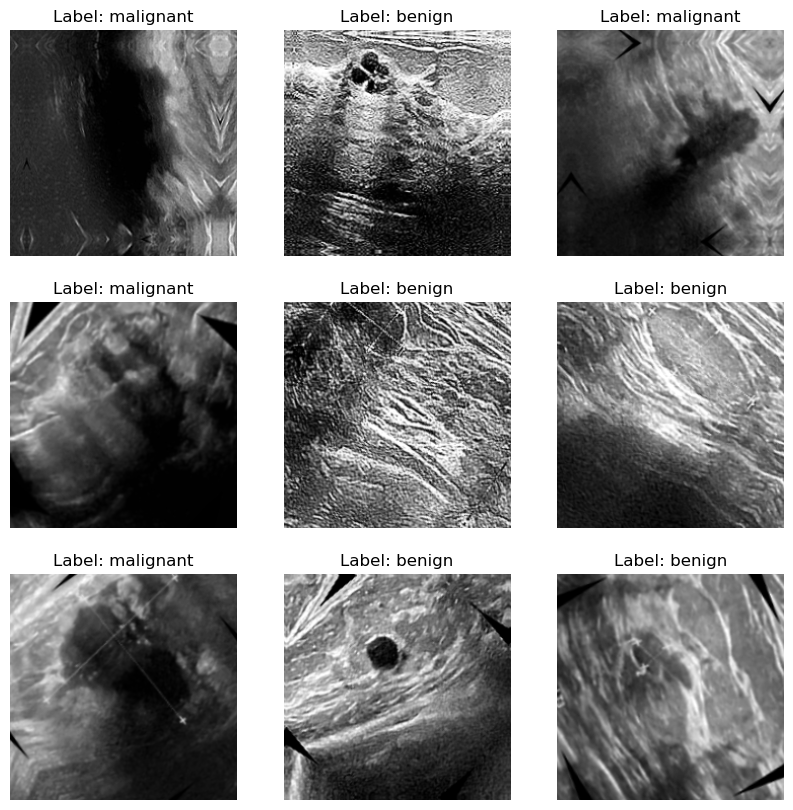

In [20]:
# Explore the first batch of preprocessed images after data augmentation
for images, labels in train_dataset.take(1):  # Iterate through the first batch of the training dataset
    plt.figure(figsize=(10, 10))  # Create a figure for plotting
    for i in range(9):  # Display the first 9 images from the batch
        ax = plt.subplot(3, 3, i + 1)  # Create a subplot for each image
        plt.imshow(tf.squeeze(images[i]), cmap='gray')  # Display the image, squeezing to remove single channel dimension
        label_name = class_names[labels[i].numpy()]  # Get the class name corresponding to the numeric label
        plt.title(f"Label: {label_name}")  # Set the title of the subplot with the class name
        plt.axis("off")  # Turn off axis
    plt.show()  # Display the plot

**Modeling**

In [21]:
from tensorflow.keras import layers, models, callbacks

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(train_dataset,
                    validation_data=test_dataset,
                    epochs=100,)

Epoch 1/100
  1/127 [..............................] - ETA: 31:17 - loss: 0.6926 - accuracy: 0.5625

In [3]:
#model summary
model.summary()

NameError: name 'model' is not defined

In [1]:
# Visualize model architecture
plot_model(model, to_file='model_architecture_layers.png', show_shapes=True)

NameError: name 'plot_model' is not defined

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

In [ ]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# True labels
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Make predictions on the test dataset
predictions = model.predict(test_dataset)
predicted_labels = (predictions > 0.5).astype("int32")

# Classification Report
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(classification_rep)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, predictions)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:

# Calculate metrics
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
logloss = log_loss(true_labels, predictions)
# Plot metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Log Loss']
values = [precision, recall, f1, logloss]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.show()

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
# Make predictions on the test dataset
predictions = model.predict(test_dataset)

# Convert predictions to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype("int32")

# Display some predicted labels
for i in range(10):
    print("Predicted Probability:", predictions[i])
    print("Predicted Label:", predicted_labels[i])


In [ ]:

# Evaluate the model using classification report
classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(classification_rep)

In [ ]:
# Save the model
model.save("breast_cancer_detection_model.h5")